# Decision Tree Regression

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### Read csv first to analyze the dependent and independent variable ,which is used directly by the class

In [4]:
dataset = pd.read_csv('BostonHousing.csv')     # Put you filename here
dataset                                   # show the dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### Creating Class

In [5]:
class DecisionTreeRegression:
    def __init__(self, dataset, NameofIndependentVar, NameofDependentVar ,split_fraction = None, cross_validation = None,max_depth=None, 
                 max_features=None,min_samples_split=None):
        if split_fraction is None:
            split_fraction = 0.2 
        if max_depth is None:
            max_depth = 5     
        if cross_validation is None:
            cross_validation = 5   
        self.cross_validation = cross_validation
        self.split_fraction = split_fraction
        self.dataset = dataset
        self.NameofIndependentVar = NameofIndependentVar
        self.NameofDependentVar = NameofDependentVar
        if max_features is None:
            max_features = len(NameofIndependentVar)
        self.max_depth = max_depth
        self.max_features = max_features
        if min_samples_split is None:
            min_samples_split = 2
        self.min_samples_split = min_samples_split    
        
    def test(self):
        # load and describe data
        dataset_n  =  pd.read_csv(self.dataset)
        print("Shape of Dataset   ---> " , str(dataset_n.shape) + "\n\n\n" )
        print("Describe the Dataset   ---> " + "\n")
        print(dataset_n.describe())
        Var_X = self.NameofIndependentVar
        Var_Y = self.NameofDependentVar
        
        #Histogram plot of dependent variable
        plt.figure(figsize=(15,10))
        plt.tight_layout()
        seabornInstance.distplot(dataset_n[Var_Y])
        
        # Splitting independent and dependent variable
        X = dataset_n[Var_X].values
        y = dataset_n[Var_Y].values
        
        # Splitting into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.split_fraction, random_state=0)
        print("\n\n\n")
        print("Shape of training data   ---> ",str(X_train.shape))
        print("Shape of test data   ---> ",str(X_test.shape))
        
        
        #Creating dictionary for parameters for gridsearch
        parametersGrid = {"max_depth": [i for i in range(self.max_depth, 1,-1)],
                    "max_features": [j for j in range(len(self.NameofIndependentVar), 1, -1)],
                    "min_samples_split": [k for k in range(self.min_samples_split,1,-1)]}

        #Fitting the train data 
        regressor = DecisionTreeRegressor()
        decision_regressor = GridSearchCV(regressor, parametersGrid, scoring='neg_mean_squared_error', cv=self.cross_validation)
        decision_regressor.fit(X_train, y_train)
        
        #Prediction of result
        Y_predicted = decision_regressor.predict(X_test)
        
        # Best parameters learned by Ridge Regression
        print("\n\n\n")
        print("Value of best parameters   ---> ")
        print(decision_regressor.best_params_)
        print(decision_regressor.best_score_)
        
        # Creating dataframe of test and predicted value
        df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_predicted.flatten()})
        print("\n\n\n")
        print("Value of test and predicted data   ---> "+"\n")
        print(df)
        print("\n\n\n")
        # Plot first few predicted and test values
        print("Compare histogram of dependent variable and graph of first few test vs predicted value   ---> "+ "\n")
        df1 = df.head(25)
        df1.plot(kind='bar',figsize=(16,10))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        print("\n\n\n")
  
        # Calculating the metric
        print("The value of different Errors   ---> "+"\n")
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_predicted))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_predicted))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_predicted)))

#### Input of class

DecisionTreeRegression('file_location.csv'[IndependentVariable],DependentVariable],degree_of_polynomial,test_train_split,no_of_k_folds,max_depth_of_tree,max_features_selected,min_sample_split)

min_sample_split -> Minimum number of samples that can be present in a leaf.Regulating it carefully can 
Note 
   - The dataset file should be in .csv format and it should be a cleaned dataset(Categorical data should be pre-processed)
   - The independent variables should be input as list  

In [6]:
dreg = DecisionTreeRegression('BostonHousing.csv',['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat'],'medv',0.2,max_depth = 30 )

Shape of Dataset   --->  (506, 14)



Describe the Dataset   ---> 

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.54940

C:\Users\boltuzamaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "






Value of best parameters   ---> 
{'max_depth': 16, 'max_features': 8, 'min_samples_split': 2}
-13.24727804421067




Value of test and predicted data   ---> 

     Actual  Predicted
0      22.6      23.40
1      50.0      21.40
2      23.0      19.20
3       8.3      11.70
4      21.2      20.80
5      19.9      18.20
6      20.6      23.80
7      18.7      20.60
8      16.1      21.80
9      18.6      19.30
10      8.8       7.20
11     17.2      17.90
12     14.9      12.60
13     10.5       8.80
14     50.0      50.00
15     29.0      37.00
16     23.0      21.20
17     33.3      36.20
18     29.4      24.75
19     21.0      19.60
20     23.8      23.10
21     19.1      21.50
22     20.4      18.50
23     29.1      24.70
24     19.3      19.40
25     23.1      21.40
26     19.6      14.50
27     19.4      21.50
28     38.7      39.80
29     18.7      16.20
..      ...        ...
72     23.5      22.30
73     31.2      32.00
74     23.7      28.70
75      7.4       8.80
76     48

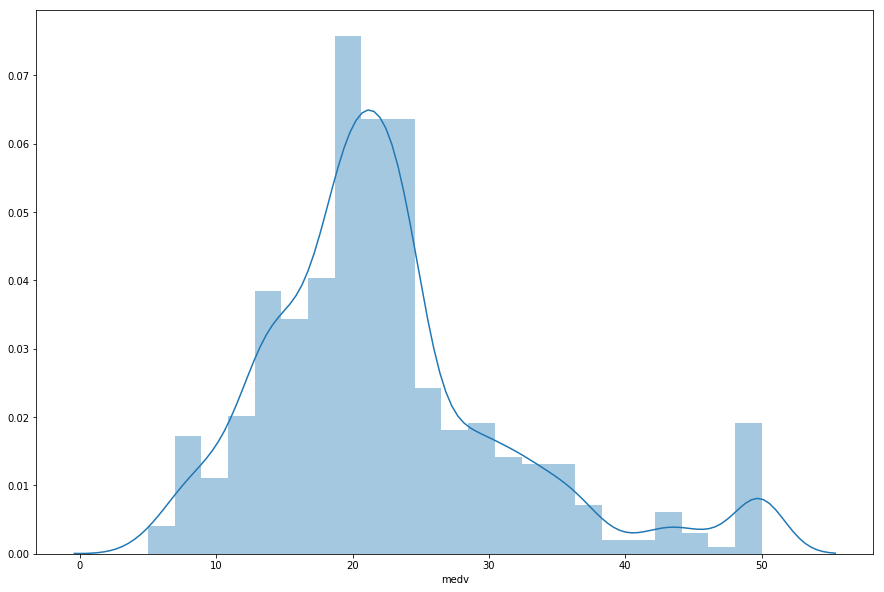

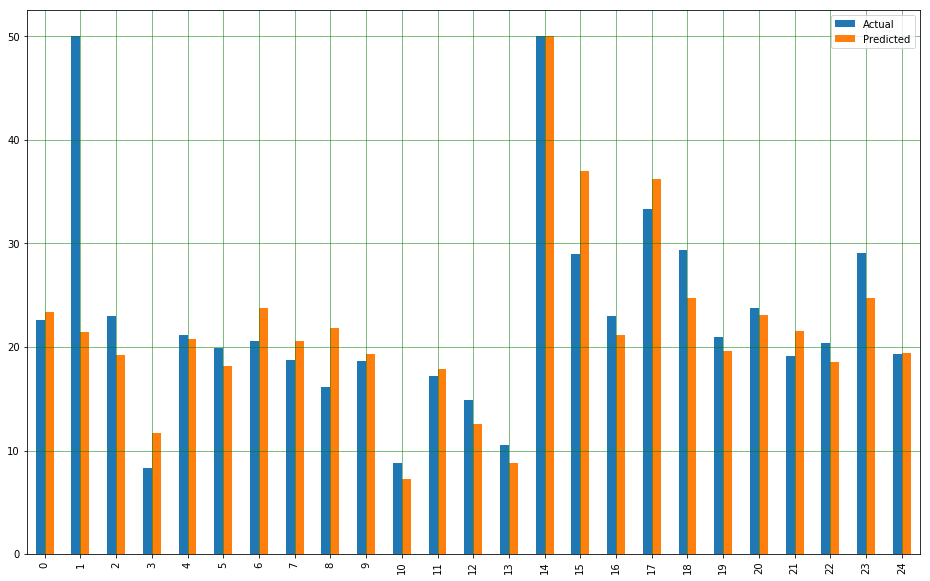





The value of different Errors   ---> 

Mean Absolute Error: 3.562745098039215
Mean Squared Error: 35.28651960784314
Root Mean Squared Error: 5.940245753152233


In [7]:
dreg.test()